In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import argrelextrema
from scipy import stats
from scipy.stats import chisquare, kstest, ks_2samp
alpha = 0.05
eps = 0.0001

# 0 Предварительный анализ данных

In [3]:
df = pd.read_csv("data/{'a': -0.2, 'b': 1.1, 'tau': 5, 'I': 0.1}_data.csv")
df2 = pd.read_csv("data/{'a': -0.3, 'b': 1.4, 'tau': 20, 'I': 0.23}_data.csv")
# релаксация
df3 = pd.read_csv("data/{'a': -0.3, 'b': 1.1, 'tau': 10, 'I': 0.15}_data.csv")

In [4]:
trajv = df['trajv'].to_numpy()
trajw = df['trajw'].to_numpy()
trajv, trajw

(array([0.005     , 0.01014999, 0.01545604, ..., 0.79303621, 0.78834657,
        0.78363416]),
 array([0.002     , 0.004028  , 0.00608519, ..., 0.48808344, 0.49264488,
        0.49710925]))

In [5]:
time_grid = np.linspace(0, 200, 4000)
time_grid

array([0.00000000e+00, 5.00125031e-02, 1.00025006e-01, ...,
       1.99899975e+02, 1.99949987e+02, 2.00000000e+02])

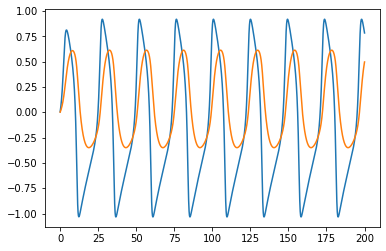

In [6]:
sns.lineplot(y=trajv, x=time_grid)
sns.lineplot(y=trajw, x=time_grid)
plt.savefig(fname='img/trajv_trajw', dpi=300)

In [7]:
var = np.array([np.var(trajv), np.var(trajw)])
var

array([0.41024597, 0.12771119])

In [8]:
mean = np.array([np.mean(trajv), np.mean(trajw)])
mean

array([-0.12203978,  0.05952117])

# 1 Распределения

(array([877, 356, 258, 196, 154, 127, 107, 111, 102,  96,  89,  89,  86,
         91, 100, 107, 130, 154, 211, 559]),
 array([-0.34899151, -0.30085886, -0.25272622, -0.20459358, -0.15646093,
        -0.10832829, -0.06019564, -0.012063  ,  0.03606965,  0.08420229,
         0.13233494,  0.18046758,  0.22860023,  0.27673287,  0.32486552,
         0.37299816,  0.42113081,  0.46926345,  0.51739609,  0.56552874,
         0.61366138]))

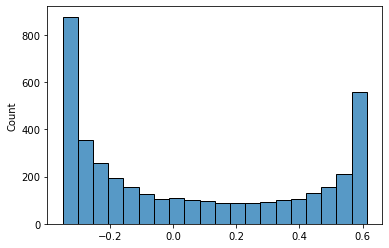

In [9]:
nbins = 20
sns.histplot(trajw, bins=nbins)
plt.savefig(fname='img/trajw_hist', dpi=300)
count, bins_edges = np.histogram(trajw, bins=nbins)
count, bins_edges

- проверим хи квадратом на равномерное распределение внутри

In [10]:
size = count.shape[0]
f_obs=count[1:size-1]
f_exp=np.zeros(size - 2) + np.mean(count[1:size-1])
f_obs, f_exp

(array([356, 258, 196, 154, 127, 107, 111, 102,  96,  89,  89,  86,  91,
        100, 107, 130, 154, 211]),
 array([142.44444444, 142.44444444, 142.44444444, 142.44444444,
        142.44444444, 142.44444444, 142.44444444, 142.44444444,
        142.44444444, 142.44444444, 142.44444444, 142.44444444,
        142.44444444, 142.44444444, 142.44444444, 142.44444444,
        142.44444444, 142.44444444]))

In [11]:
chisq, pvalue = chisquare(f_obs=f_obs, f_exp=f_exp, ddof=(size - 2) - 2 - 1)
chisq, pvalue

(616.5803432137285, 1.2920509690842008e-134)

In [12]:
if (pvalue < alpha):
    print('Reject')
else:
    print('Accept')

Reject


- Kolmogorov-Smirnov test

In [13]:
ks, pvalue = kstest(trajw, stats.norm.cdf, N=size, alternative='two-sided')
ks, pvalue

(0.36354784190570055, 0.0)

In [14]:
if (pvalue < alpha):
    print('Reject')
else:
    print('Accept')

Reject


(array([363, 239, 242, 254, 264, 262, 241, 192, 143, 116, 104, 104, 103,
        110, 125, 148, 169, 195, 250, 376]),
 array([-1.03282471, -0.93522908, -0.83763345, -0.74003783, -0.6424422 ,
        -0.54484657, -0.44725095, -0.34965532, -0.2520597 , -0.15446407,
        -0.05686844,  0.04072718,  0.13832281,  0.23591844,  0.33351406,
         0.43110969,  0.52870531,  0.62630094,  0.72389657,  0.82149219,
         0.91908782]))

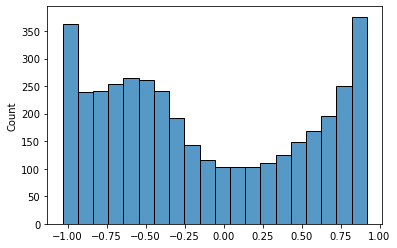

In [15]:
sns.histplot(trajv, bins=nbins)
plt.savefig(fname='img/trajv_hist', dpi=300)
count, bins_edges = np.histogram(trajv, bins=nbins)
count, bins_edges

- проверим хи квадратом на равномерное распределение внутри

In [16]:
size = count.shape[0]
f_obs=count[1:size-1]
f_exp=np.zeros(size - 2) + np.sum(count[1:size-1])/ (size-2)
f_obs, f_exp

(array([239, 242, 254, 264, 262, 241, 192, 143, 116, 104, 104, 103, 110,
        125, 148, 169, 195, 250]),
 array([181.16666667, 181.16666667, 181.16666667, 181.16666667,
        181.16666667, 181.16666667, 181.16666667, 181.16666667,
        181.16666667, 181.16666667, 181.16666667, 181.16666667,
        181.16666667, 181.16666667, 181.16666667, 181.16666667,
        181.16666667, 181.16666667]))

In [17]:
chisq, pvalue = chisquare(f_obs=f_obs, f_exp=f_exp, ddof=(size - 2) - 2 - 1)
chisq, pvalue

(372.93008279668817, 1.0453493483322674e-81)

In [18]:
if (pvalue < alpha):
    print('Reject')
else:
    print('Accept')

Reject


- Kolmogorov-Smirnov test

In [19]:
ks, pvalue = kstest(trajv, stats.norm.cdf, N=size, alternative='two-sided')
ks, pvalue

(0.17902481972902473, 1.2454371786597417e-112)

In [20]:
if (pvalue < alpha):
    print('Reject')
else:
    print('Accept')

Reject


# 2 Периодичность на примере trajv

In [21]:
data = df['trajv']
# data = df3['trajv']
data

0       0.005000
1       0.010150
2       0.015456
3       0.020924
4       0.026562
          ...   
3995    0.802344
3996    0.797702
3997    0.793036
3998    0.788347
3999    0.783634
Name: trajv, Length: 4000, dtype: float64

In [22]:
indexes = argrelextrema(data.to_numpy(), np.greater)[0]
indexes

array([  83,  554, 1040, 1527, 2014, 2500, 2987, 3474, 3960])

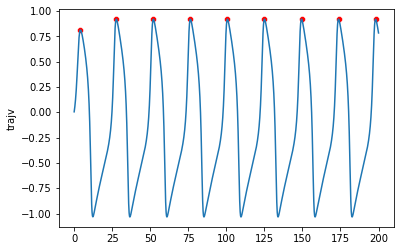

In [23]:
sns.lineplot(y=data, x=time_grid)
sns.scatterplot(y=data[indexes], x=time_grid[indexes], color='r')
plt.savefig(fname='img/trajv_with_max', dpi=300)

In [24]:
samples = np.array_split(data.to_numpy(), indexes)
samples[0]

array([0.005     , 0.01014999, 0.01545604, 0.0209244 , 0.02656152,
       0.03237405, 0.03836883, 0.04455288, 0.05093339, 0.05751774,
       0.06431344, 0.07132817, 0.07856969, 0.08604589, 0.09376472,
       0.10173417, 0.10996224, 0.11845688, 0.12722594, 0.13627716,
       0.14561802, 0.15525575, 0.1651972 , 0.17544878, 0.18601634,
       0.19690503, 0.20811926, 0.21966248, 0.23153711, 0.24374432,
       0.25628393, 0.26915422, 0.28235173, 0.29587111, 0.30970496,
       0.32384359, 0.33827493, 0.35298432, 0.36795437, 0.3831649 ,
       0.39859279, 0.41421197, 0.42999339, 0.44590509, 0.46191229,
       0.47797755, 0.494061  , 0.51012061, 0.52611259, 0.54199176,
       0.55771204, 0.57322697, 0.58849027, 0.60345638, 0.6180811 ,
       0.63232212, 0.64613957, 0.65949652, 0.67235945, 0.68469859,
       0.69648824, 0.70770694, 0.71833763, 0.72836764, 0.73778864,
       0.74659651, 0.75479112, 0.76237605, 0.76935831, 0.77574796,
       0.78155778, 0.78680282, 0.79150012, 0.79566827, 0.79932

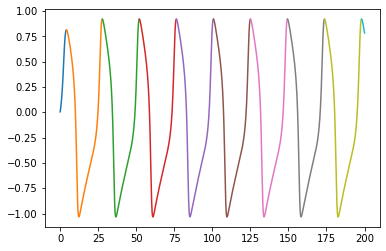

In [25]:
left = 0
for i in range(len(samples)):
    right = samples[i].shape[0]
    sns.lineplot(y=samples[i], x=time_grid[left:left+right])
    left += right
    
plt.savefig(fname='img/trajv_samples', dpi=300)

In [26]:
samples = samples[1:len(samples) - 1]
len(samples)

8

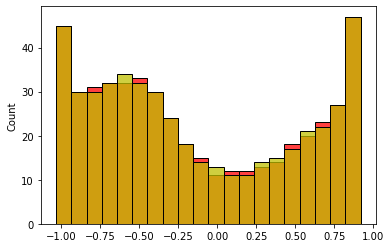

In [27]:
sns.histplot(samples[2], color='r', bins=20)
sns.histplot(samples[3], color='y', bins=20)
plt.savefig(fname='img/samples_covering', dpi=300)

- chi square test

In [28]:
h1, h2 = np.histogram(samples[2], bins=20), np.histogram(samples[3], bins=20)
h1, h2

((array([45, 30, 31, 32, 32, 33, 30, 24, 18, 15, 11, 12, 12, 13, 14, 18, 20,
         23, 27, 47]),
  array([-1.03276665, -0.93517508, -0.83758351, -0.73999193, -0.64240036,
         -0.54480879, -0.44721721, -0.34962564, -0.25203407, -0.1544425 ,
         -0.05685092,  0.04074065,  0.13833222,  0.2359238 ,  0.33351537,
          0.43110694,  0.52869852,  0.62629009,  0.72388166,  0.82147324,
          0.91906481])),
 (array([45, 30, 30, 32, 34, 32, 30, 24, 18, 14, 13, 11, 11, 14, 15, 17, 21,
         22, 27, 47]),
  array([-1.03282136, -0.9352259 , -0.83763044, -0.74003498, -0.64243953,
         -0.54484407, -0.44724861, -0.34965315, -0.25205769, -0.15446223,
         -0.05686677,  0.04072869,  0.13832415,  0.23591961,  0.33351507,
          0.43111052,  0.52870598,  0.62630144,  0.7238969 ,  0.82149236,
          0.91908782])))

In [29]:
chisq, pvalue = chisquare(f_obs=h1[0], f_exp=h2[0])
chisq, pvalue

(1.0331618136765195, 0.9999999989578264)

In [30]:
if (pvalue > alpha):
    print('Accept')
else:
    print('Reject')

Accept


- Kolmogorov-Smornov 2 sample test

In [31]:
ks, pvalue = ks_2samp(samples[2], samples[3])
ks, pvalue

(0.002053388090349076, 1.0)

In [32]:
if (pvalue > alpha):
    print('Accept')
else:
    print('Reject')

Accept


- Паттерный анализ

- составляем вектор из статистик и сравниваем

In [33]:
vec1 = np.array([np.mean(samples[2]), np.var(samples[2]), np.max(samples[2]), np.min(samples[2]), np.quantile(samples[2], 0.25)])
vec1

array([-0.13839642,  0.40887543,  0.91906481, -1.03276665, -0.6878998 ])

In [34]:
vec2 = np.array([np.mean(samples[3]), np.var(samples[3]), np.max(samples[3]), np.min(samples[3]), np.quantile(samples[3], 0.25)])
vec2

array([-0.13839637,  0.40887554,  0.91908782, -1.03282136, -0.69010557])

In [35]:
err = np.linalg.norm(vec1 - vec2)
err

0.00220657222355686

- проверка релаксирующих данных на периодичность

# 3 Релаксация

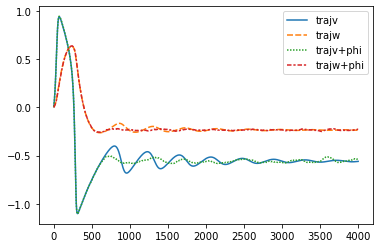

In [36]:
sns.lineplot(data=df3)
plt.savefig(fname='img/relax', dpi=300)

In [37]:
trajw3 = df3['trajw'].to_numpy()
trajv3 = df3['trajv'].to_numpy()
trajw3, trajv3

(array([ 0.0015    ,  0.00302925,  0.00458909, ..., -0.23623768,
        -0.23624054, -0.23624293]),
 array([ 0.0075    ,  0.01529998,  0.02341334, ..., -0.56043346,
        -0.56034205, -0.56025022]))

In [38]:
vars = np.array([np.var(trajv3), np.var(trajw3)])
vars

array([0.10331205, 0.03766397])

- берем окно из 500 точек и считаем среднее, усредняем среднее и получаем treshold

-0.23339866119891664

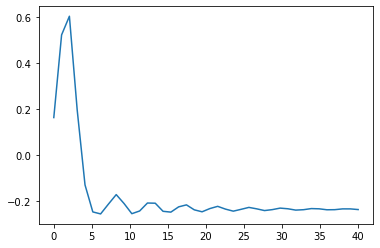

In [39]:
means = np.array([np.mean(trajw3[i:i+100]) for i in range(0, trajw3.shape[0], 100)])
sns.lineplot(y=means, x=np.linspace(0, means.shape[0], means.shape[0]))
plt.savefig(fname='img/relax_mean', dpi=300)
mean = np.mean(means[int(means.shape[0]/2):])
mean

In [40]:
errors = np.array([np.linalg.norm(trajw3[i:i+500] - mean) for i in range(0, trajw3.shape[0], 500)])
errors

array([12.91178283,  0.80950388,  0.47128994,  0.2968822 ,  0.17153389,
        0.11739891,  0.06647985,  0.04895202])

- последовательность убывает, рассматриваем элементы не превосходящие threshold

# 4 Равенство двух датасетов

- Критерием равенства двух датасетов может служить, например, равенство дисперсий и средних

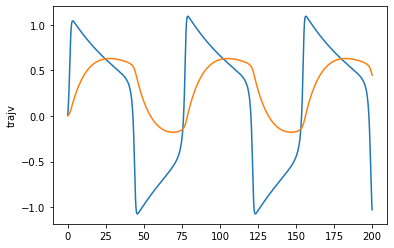

In [41]:
sns.lineplot(y=df2['trajv'], x=time_grid)
sns.lineplot(y=df2['trajw'], x=time_grid)
plt.savefig(fname='img/data_eq', dpi=300)

In [42]:
var2 = np.array([np.var(df2['trajv']), np.var(df2['trajw'])])
var2

array([0.48716128, 0.09389005])

In [43]:
mean2 = np.array([np.mean(df2['trajv']), np.mean(df2['trajw'])])
mean2

array([0.1976748 , 0.32384238])

In [44]:
mean == mean2, var == var2

(array([False, False]), array([False, False]))

In [45]:
np.linalg.norm(mean - mean2) < eps, np.linalg.norm(var - var2) < eps

(False, False)